<a href="https://colab.research.google.com/github/roshank1605A04/Employee-Reviews/blob/master/Employee_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [107]:
# reading the data

data = pd.read_csv('drive/My Drive/Projects/practice/Employee Reviews/employee_reviews.csv')

# shape of data
data.shape

(67529, 17)

In [108]:
# looking at the head of the data

data.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [109]:
# describing the data

data.describe()

,Unnamed: 0,overall-ratings,helpful-count
count,67529.000000,67529.000000,67529.000000
mean,33765.000000,3.826075,1.268211
std,19494.087501,1.154989,16.085852
min,1.000000,1.000000,0.000000
25%,16883.000000,3.000000,0.000000
50%,33765.000000,4.000000,0.000000
75%,50647.000000,5.000000,1.000000
max,67529.000000,5.000000,2094.000000


In [110]:
# information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [111]:
# checking if there is any NULL values inside the data

data.isnull().sum()

Unnamed: 0                      0
company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
helpful-count                   0
link                            0
dtype: int64

In [0]:
# Data Transformations

# replacing all the none with 0
data['work-balance-stars'] = np.where(data['work-balance-stars']=='none', 0, data['work-balance-stars'])
data['culture-values-stars'] = np.where(data['culture-values-stars']=='none', 0, data['culture-values-stars'])
data['carrer-opportunities-stars'] = np.where(data['carrer-opportunities-stars']=='none', 0, data['carrer-opportunities-stars'])
data['comp-benefit-stars'] = np.where(data['comp-benefit-stars']=='none', 0, data['comp-benefit-stars'])
data['senior-mangemnet-stars'] = np.where(data['senior-mangemnet-stars']=='none', 0, data['senior-mangemnet-stars'])

# converting all the integer data into numeric
data['work-balance-stars'] = pd.to_numeric(data['work-balance-stars'])
data['culture-values-stars'] = pd.to_numeric(data['culture-values-stars'])
data['carrer-opportunities-stars'] = pd.to_numeric(data['carrer-opportunities-stars'])
data['comp-benefit-stars'] = pd.to_numeric(data['comp-benefit-stars'])
data['senior-mangemnet-stars'] = pd.to_numeric(data['senior-mangemnet-stars'])


Text(0.5, 1.0, 'No. of Reviews per Company')

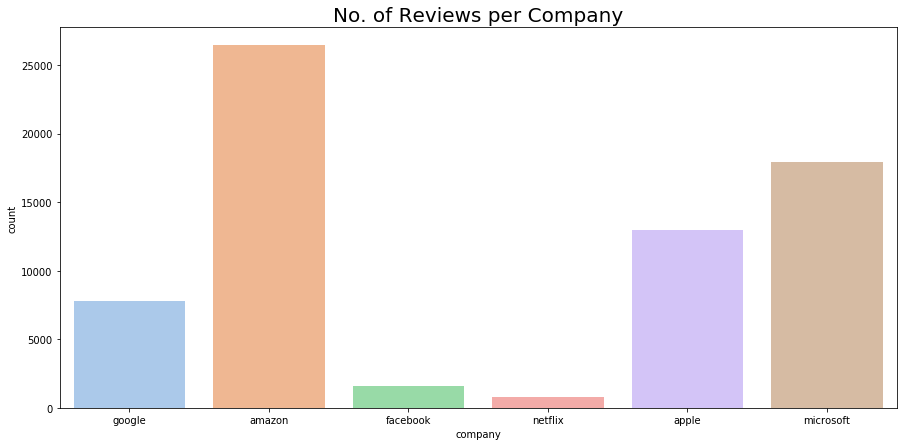

In [113]:
# let's look at the no. of reviews per companies

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(data['company'], palette = 'pastel')
plt.title('No. of Reviews per Company', fontsize = 20)

In [114]:
# let's look at the columns of the data

data.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

Text(0.5, 1.0, 'Company vs Management stars')

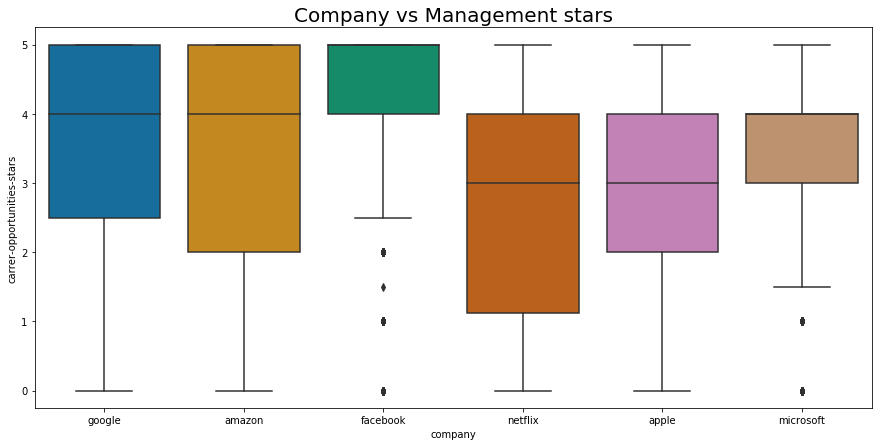

In [115]:
# company vs career opputunities

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = data['company'], y = data['carrer-opportunities-stars'], palette = 'colorblind')
plt.title('Company vs Management stars', fontsize = 20)

Text(0.5, 1.0, 'Company vs Culture stars')

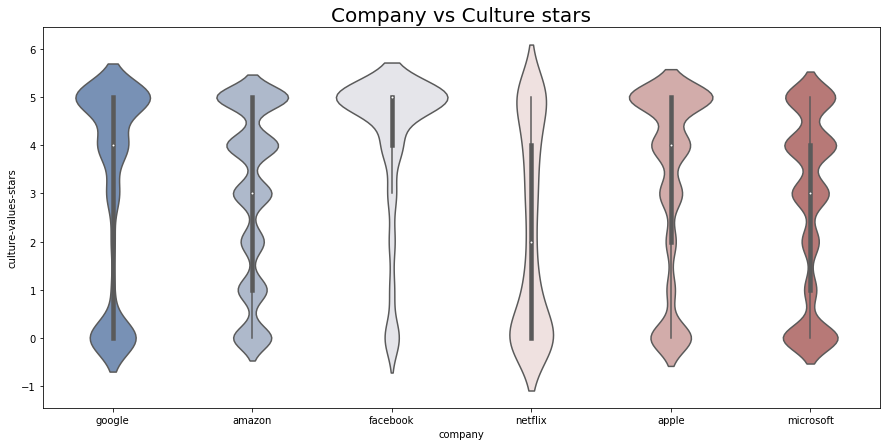

In [116]:
# company vs culture stars

plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x = data['company'], y = data['culture-values-stars'], palette = 'vlag')
plt.title('Company vs Culture stars', fontsize = 20)

Text(0.5, 1.0, 'Company vs Benefits stars')

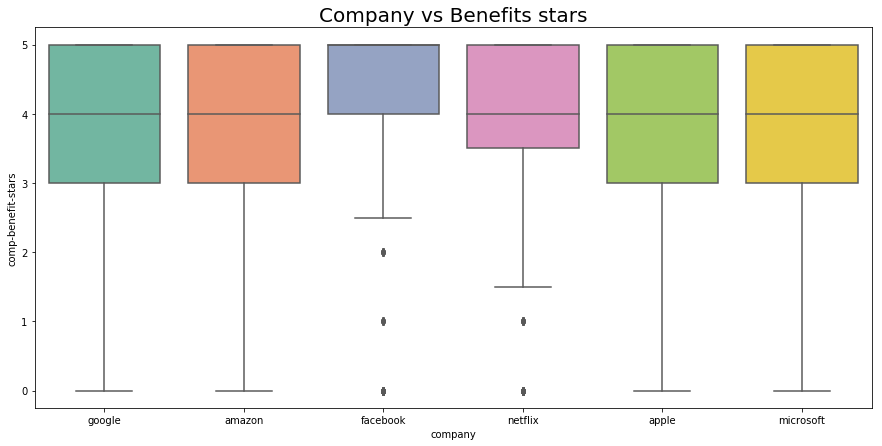

In [117]:
# company vs comp-benefit-stars

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = data['company'], y = data['comp-benefit-stars'], palette = 'Set2')
plt.title('Company vs Benefits stars', fontsize = 20)

Text(0.5, 1.0, 'Company vs Management stars')

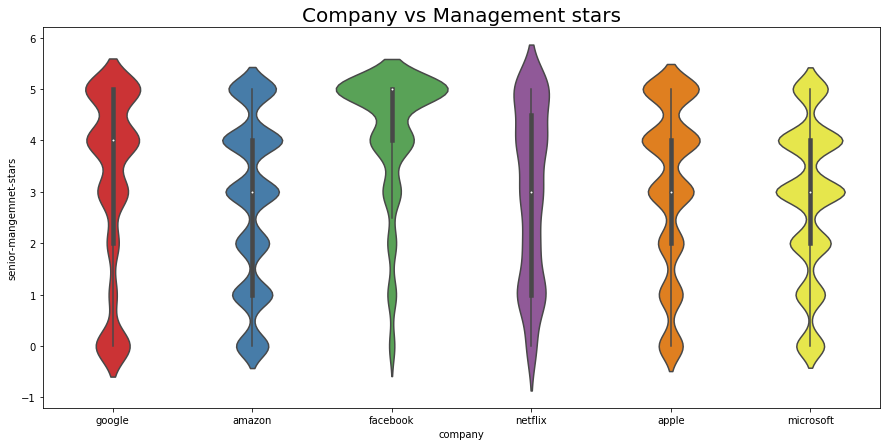

In [118]:
# company vs senior-management-stars

plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x = data['company'], y = data['senior-mangemnet-stars'], palette = 'Set1')
plt.title('Company vs Management stars', fontsize = 20)

Text(0.5, 1.0, 'Company vs Work-balance-stars')

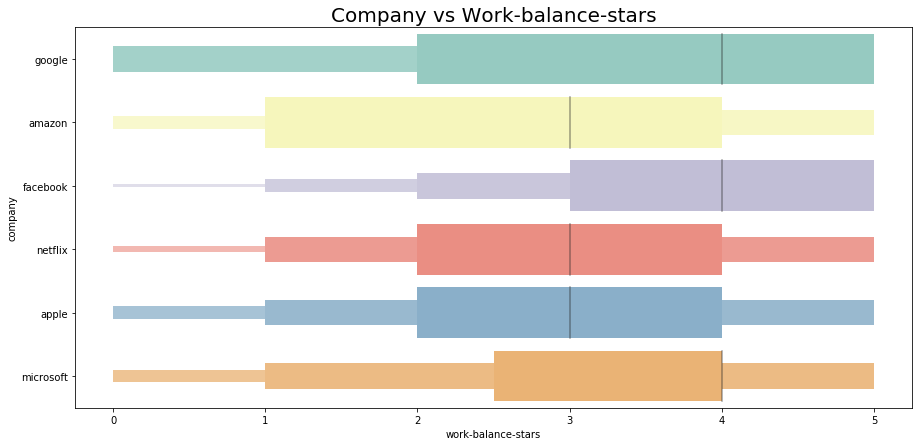

In [119]:
# company vs work-balance-stars

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxenplot(y = 'company', x ='work-balance-stars', data = data, palette = 'Set3')
plt.title('Company vs Work-balance-stars', fontsize = 20)

Text(0.5, 1.0, 'Company vs Ratings')

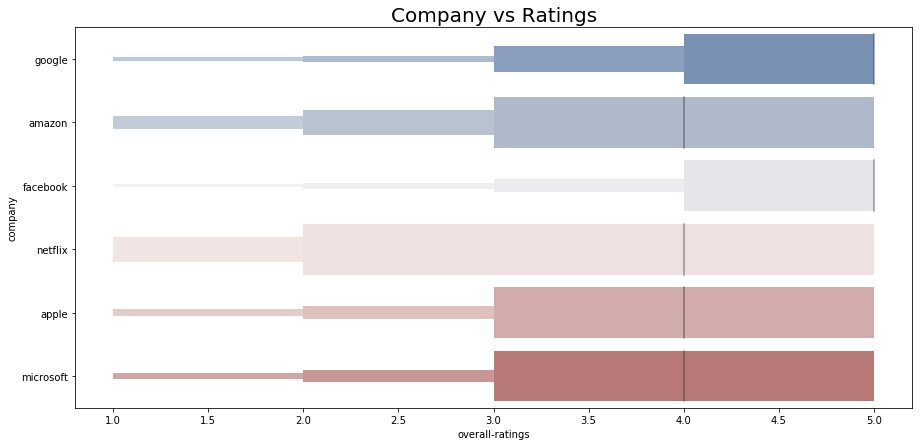

In [120]:
# company vs Rating

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxenplot(x = 'overall-ratings', y = 'company', data = data, palette = 'vlag')
plt.title('Company vs Ratings', fontsize = 20)

(-0.5, 1199.5, 1199.5, -0.5)

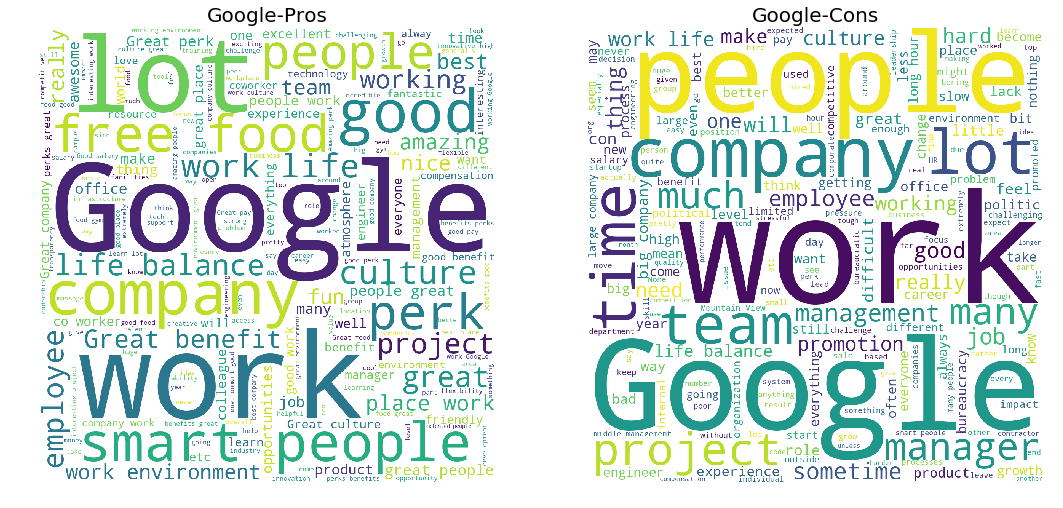

In [121]:


# google's summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in data['pros'][data['company'] == 'google']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Google-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['cons'][data['company'] == 'google']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Google-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')


(-0.5, 1199.5, 1199.5, -0.5)

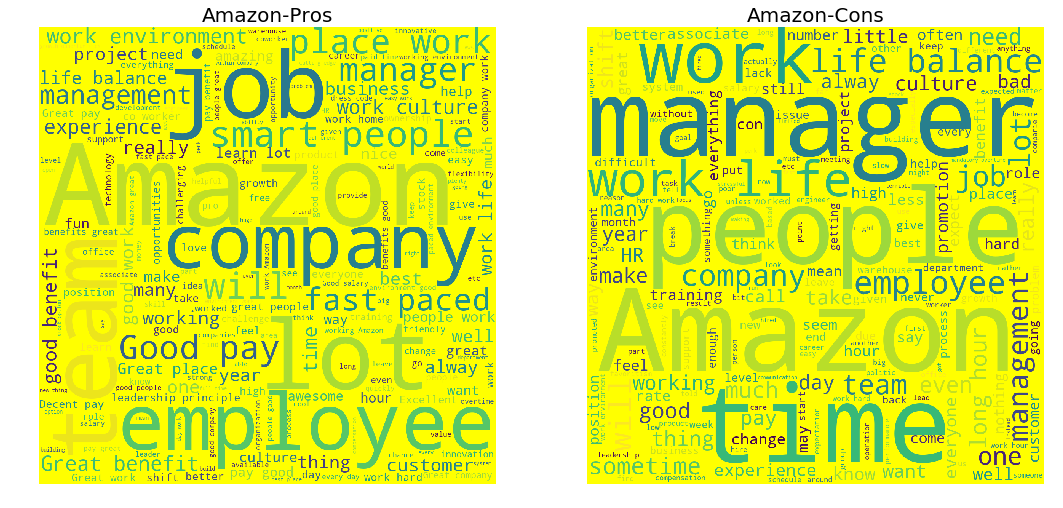

In [122]:
# amazon's summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in data['pros'][data['company'] == 'amazon']])

wordcloud = WordCloud(background_color = 'yellow', width = 1200, height = 1200).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Amazon-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['cons'][data['company'] == 'amazon']])

wordcloud2 = WordCloud(background_color = 'yellow', width = 1200, height = 1200).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Amazon-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

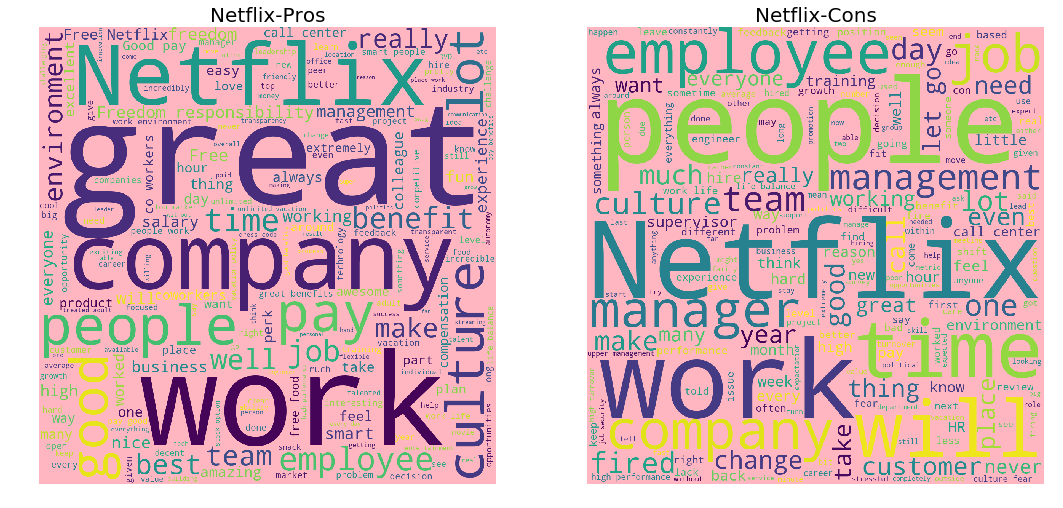

In [123]:
# netflix's summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in data['pros'][data['company'] == 'netflix']])

wordcloud = WordCloud(background_color = 'lightpink', width = 1200, height = 1200).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Netflix-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['cons'][data['company'] == 'netflix']])

wordcloud2 = WordCloud(background_color = 'lightpink', width = 1200, height = 1200).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Netflix-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

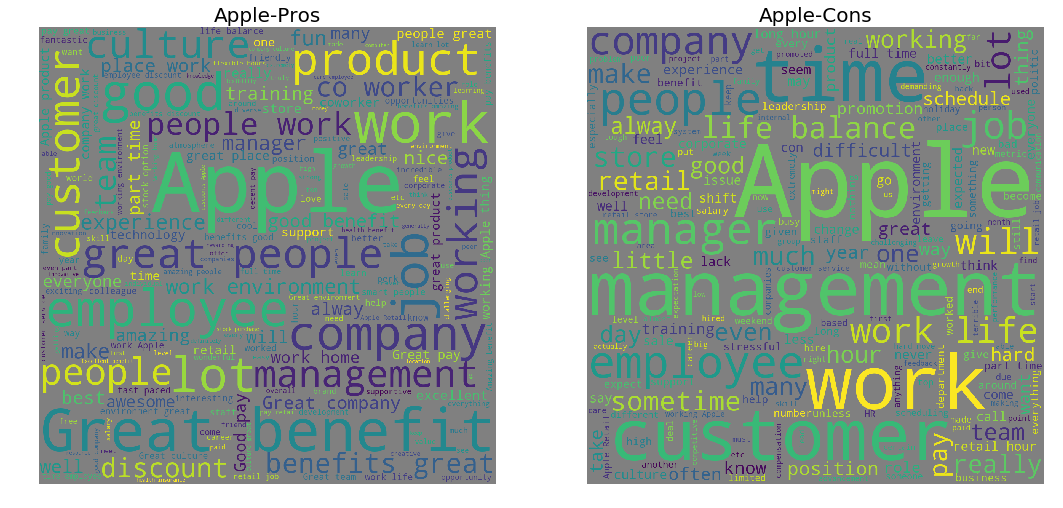

In [124]:
# apple's summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in data['pros'][data['company'] == 'apple']])

wordcloud = WordCloud(background_color = 'gray', width = 1200, height = 1200).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Apple-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['cons'][data['company'] == 'apple']])

wordcloud2 = WordCloud(background_color = 'gray', width = 1200, height = 1200).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Apple-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

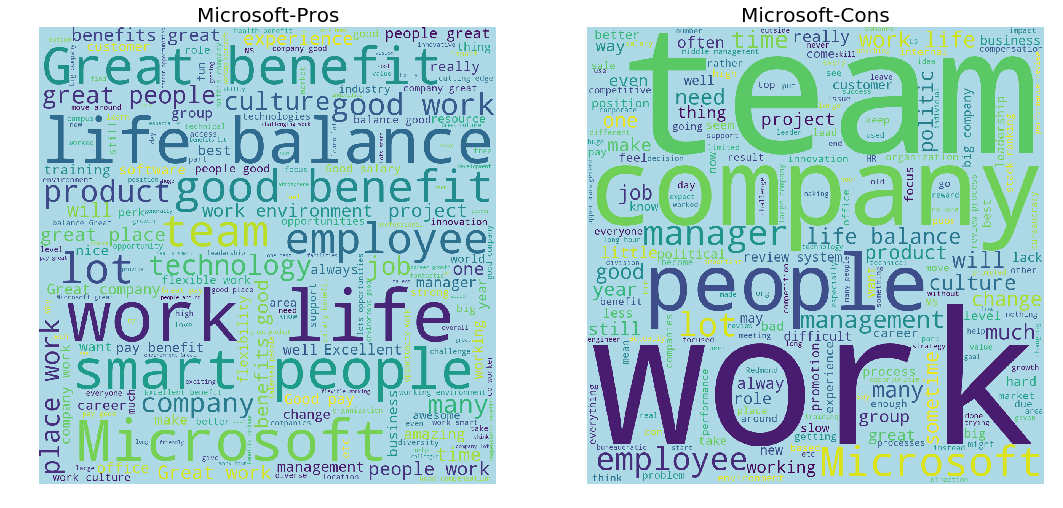

In [125]:
# microsoft's summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in data['pros'][data['company'] == 'microsoft']])

wordcloud = WordCloud(background_color = 'lightblue', width = 1200, height = 1200).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Microsoft-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['cons'][data['company'] == 'microsoft']])

wordcloud2 = WordCloud(background_color = 'lightblue', width = 1200, height = 1200).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Microsoft-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

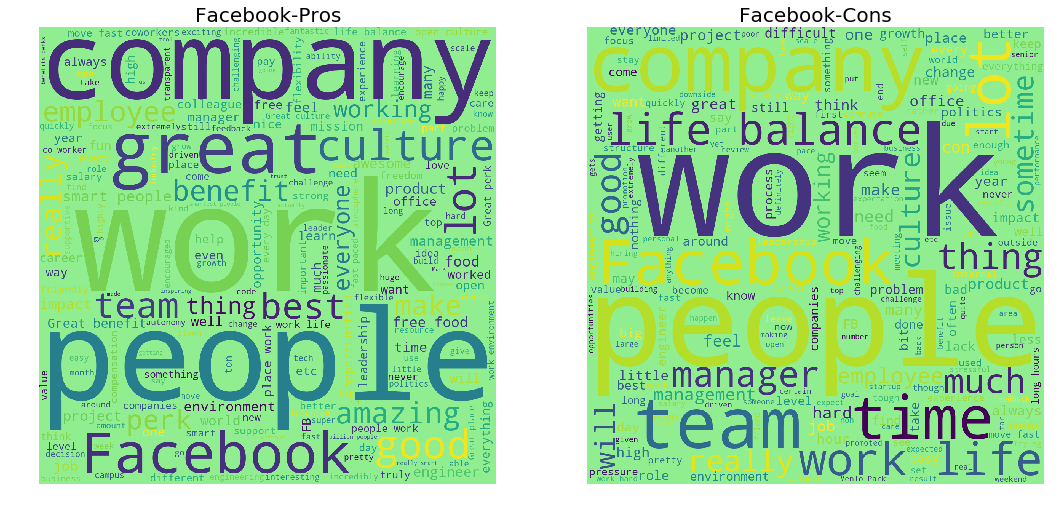

In [126]:
# facebook's summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in data['pros'][data['company'] == 'facebook']])

wordcloud = WordCloud(background_color = 'lightgreen', width = 1200, height = 1200).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Facebook-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in data['cons'][data['company'] == 'facebook']])

wordcloud2 = WordCloud(background_color = 'lightgreen', width = 1200, height = 1200).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Facebook-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

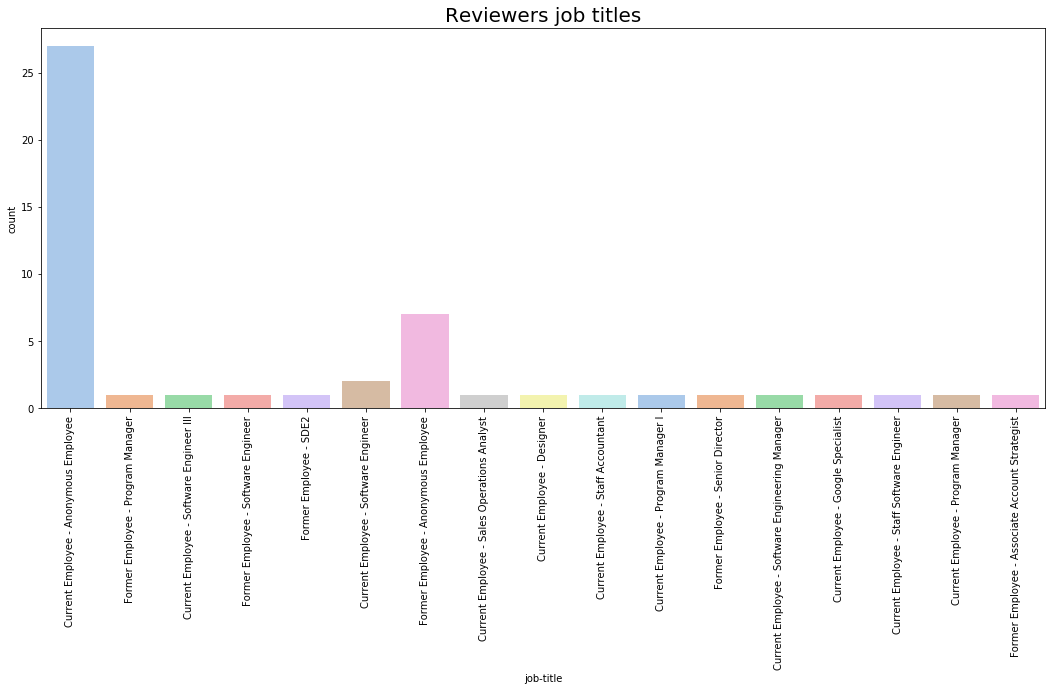

In [127]:
# reviewers' job-title

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(data['job-title'].head(50), palette = 'pastel')
plt.title('Reviewers job titles', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

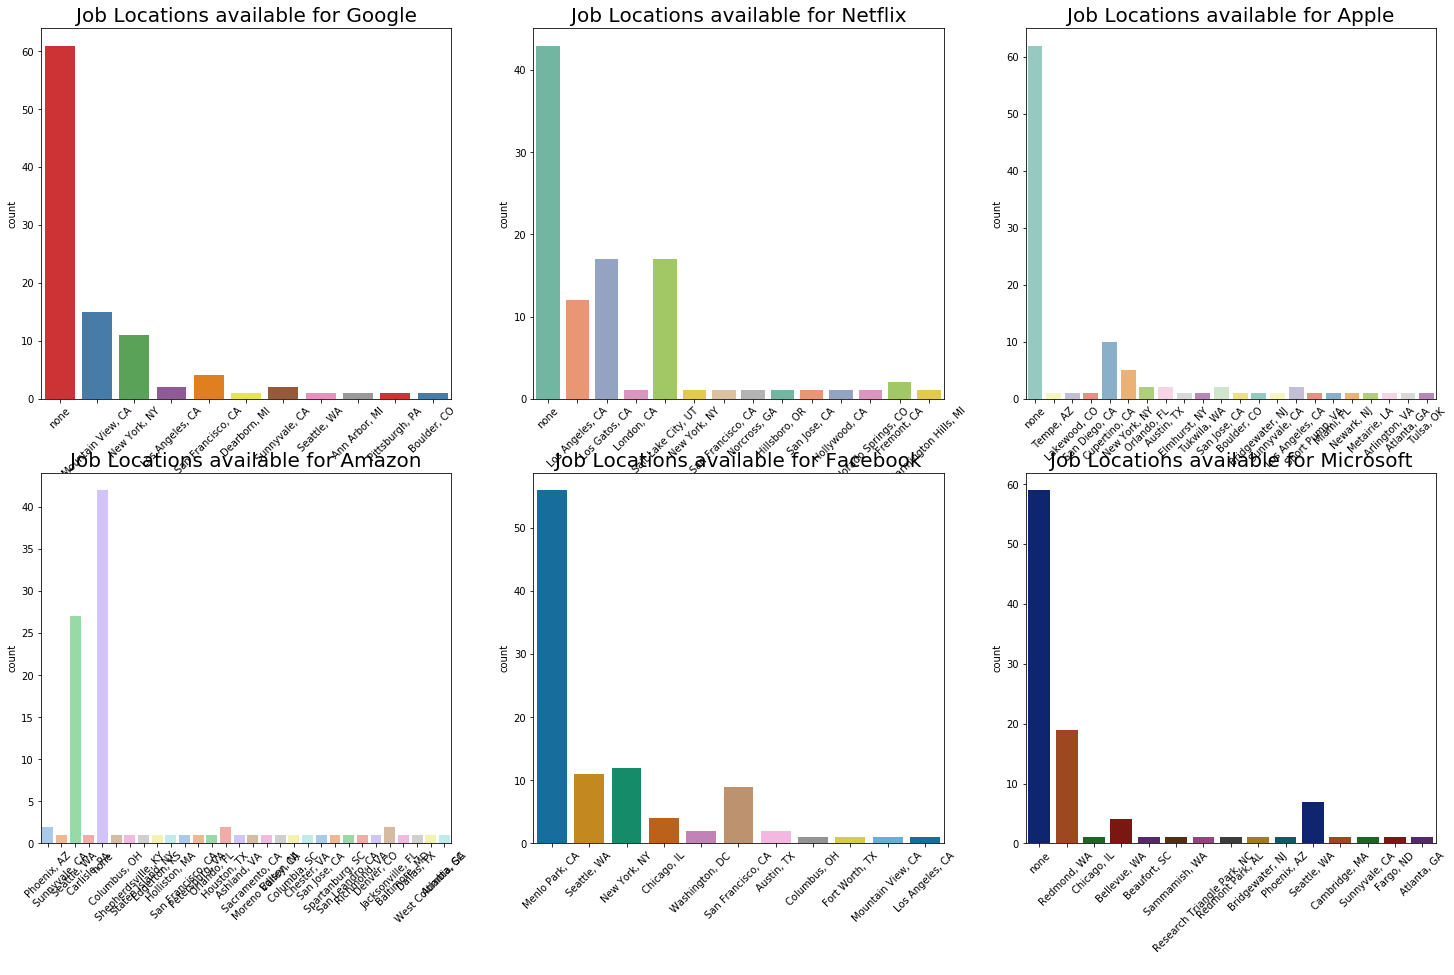

In [128]:
# checking the job locations available for google

plt.rcParams['figure.figsize'] = (25, 15)

plt.subplot(2, 3, 1)
x = data[data['company'] == 'google']['location'].head(100)

sns.countplot(x, palette = 'Set1')
plt.title('Job Locations available for Google', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 45)

# checking the job locations available for netflix

plt.subplot(2, 3, 2)
x = data[data['company'] == 'netflix']['location'].head(100)

sns.countplot(x, palette = 'Set2')
plt.title('Job Locations available for Netflix', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 45)

# checking the job locations available for apple

plt.subplot(2, 3, 3)
x = data[data['company'] == 'apple']['location'].head(100)

sns.countplot(x, palette = 'Set3')
plt.title('Job Locations available for Apple', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 45)

# checking the job locations available for amazon

plt.subplot(2, 3, 4)
x = data[data['company'] == 'amazon']['location'].head(100)

sns.countplot(x, palette = 'pastel')
plt.title('Job Locations available for Amazon', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 45)

# checking the job locations available for facebook

plt.subplot(2, 3, 5)
x = data[data['company'] == 'facebook']['location'].head(100)

sns.countplot(x, palette = 'colorblind')
plt.title('Job Locations available for Facebook', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 45)

# checking the job locations available for microsoft

plt.subplot(2, 3, 6)
x = data[data['company'] == 'microsoft']['location'].head(100)

sns.countplot(x, palette = 'dark')
plt.title('Job Locations available for Microsoft', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 45)

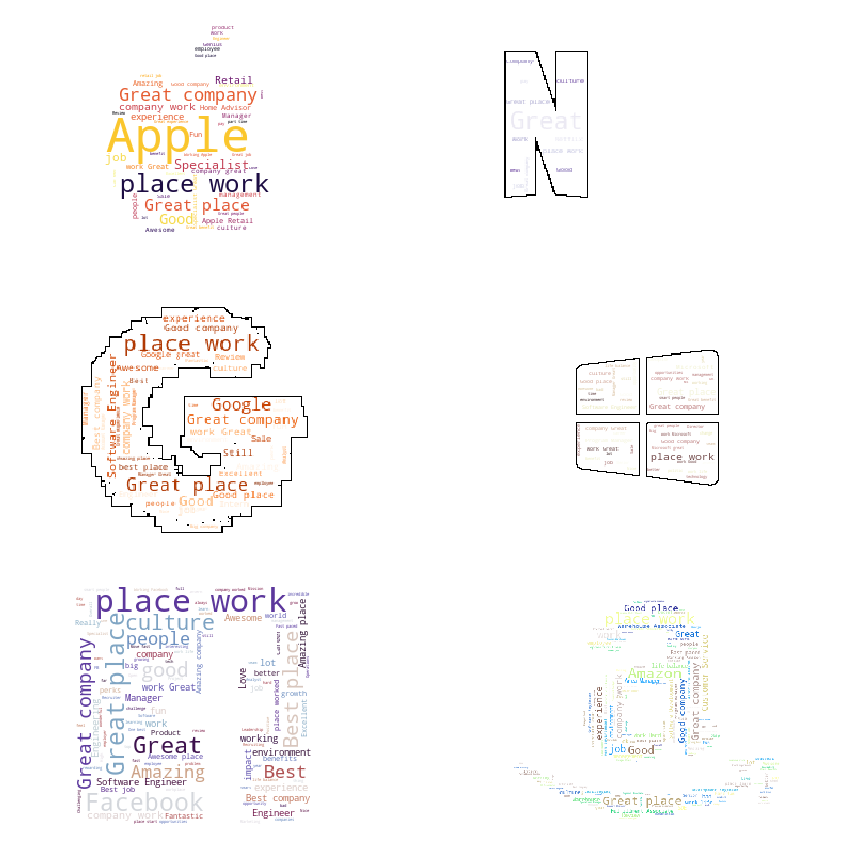

In [129]:
# summary for all the comapnies

from PIL import Image
from matplotlib import cm

plt.rcParams['figure.figsize'] = (15, 15)

# for apple
apple_mask = np.array(Image.open("drive/My Drive/Projects/practice/Employee Reviews/apple.png").convert('L'))
summary = " ".join(str(review) for review in data['summary'][data['company'] == 'apple'])
wc1 = WordCloud(background_color="white", mask=apple_mask, width = 1000, height = 1000, max_font_size = 300, contour_width = 0,
                colormap = plt.cm.inferno).generate(summary)

plt.subplot(3, 2, 1)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.imshow(wc1)


# for netflix
netflix_mask = np.array(Image.open("drive/My Drive/Projects/practice/Employee Reviews/netflix.png").convert('L'))
summary = " ".join(str(review) for review in data['summary'][data['company'] == 'netflix'])
wc1 = WordCloud(background_color = "white", mask = netflix_mask, width = 1000, height = 1000, max_font_size = 300, contour_width = 1,
               colormap = plt.cm.Purples).generate(summary)

plt.subplot(3, 2, 2)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.imshow(wc1)


# for google
google_mask = np.array(Image.open("drive/My Drive/Projects/practice/Employee Reviews/google.jpg").convert('L'))
summary = " ".join(str(review) for review in data['summary'][data['company'] == 'google'])
wc1 = WordCloud(background_color = "white", mask = google_mask, width = 1000, height = 1000, max_font_size = 300, contour_width = 1,
               colormap = plt.cm.Oranges).generate(summary)

plt.subplot(3, 2, 3)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.imshow(wc1)


# for microsoft
microsoft_mask = np.array(Image.open("drive/My Drive/Projects/practice/Employee Reviews/microsoft.png").convert('L'))
summary = " ".join(str(review) for review in data['summary'][data['company'] == 'microsoft'])
wc1 = WordCloud(background_color="white", mask = microsoft_mask, width = 1000, height = 1000, max_font_size = 300, contour_width = 1,
               colormap = plt.cm.pink).generate(summary)

plt.subplot(3, 2, 4)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.imshow(wc1)


# for facebook
facebook_mask = np.array(Image.open("drive/My Drive/Projects/practice/Employee Reviews/facebook.png").convert('L'))
summary = " ".join(str(review) for review in data['summary'][data['company'] == 'facebook'])
wc1 = WordCloud(background_color = "white", mask = facebook_mask, width = 1000, height = 1000, max_font_size = 300, contour_width = 0,
               colormap = plt.cm.twilight).generate(summary)

plt.subplot(3, 2, 5)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.imshow(wc1)


# for amazon
amazon_mask = np.array(Image.open("drive/My Drive/Projects/practice/Employee Reviews/amazon.jpg").convert('L'))
summary = " ".join(str(review) for review in data['summary'][data['company'] == 'amazon'])
wc1 = WordCloud(background_color = "white", mask = amazon_mask, max_font_size = 300, contour_width = 0,
               colormap = plt.cm.terrain).generate(summary)

plt.subplot(3, 2, 6)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.imshow(wc1)

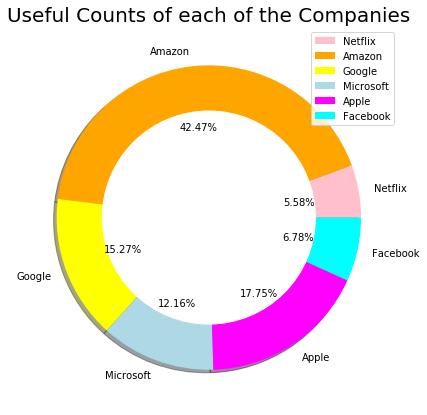

In [130]:
# looking at helpful count

netflix = data['helpful-count'][data['company'] == 'netflix'].sum().mean()
amazon = data['helpful-count'][data['company'] == 'amazon'].sum().mean()
google = data['helpful-count'][data['company'] == 'google'].sum().mean()
microsoft = data['helpful-count'][data['company'] == 'microsoft'].sum().mean()
apple = data['helpful-count'][data['company'] == 'apple'].sum().mean()
facebook = data['helpful-count'][data['company'] == 'facebook'].sum().mean()

# let's make a pie chart for avg. useful counts for each of the company
size = [netflix, amazon, google, microsoft, apple, facebook]
labels = "Netflix", "Amazon", "Google", "Microsoft", "Apple", "Facebook"
colors = ['pink', 'orange', 'yellow', 'lightblue', 'magenta', 'cyan']

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Useful Counts of each of the Companies', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [131]:
# clustering of the companies according to their overall-ratings

# let's create avg_ratings
data['avg-ratings'] = data['overall-ratings'] + data['work-balance-stars'] + data['culture-values-stars'] + data['carrer-opportunities-stars'] + data['comp-benefit-stars']
data['avg-ratings'] = data['avg-ratings']/5


# let's take company's helpful count and their average ratings
x = data.iloc[:, [15, 17]].values
x.shape

(67529, 2)

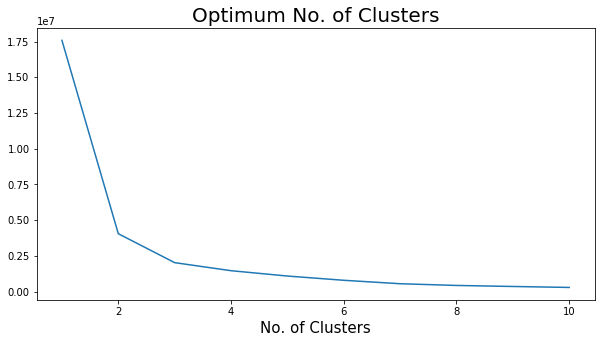

In [132]:
# applying the elbow method to get the optimum no. of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0, init = 'k-means++')
  kmeans.fit_predict(x)
  wcss.append(kmeans.inertia_)
  
  
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 11), wcss)
plt.title('Optimum No. of Clusters', fontsize = 20)
plt.xlabel('No. of Clusters', fontsize = 15)
plt.show()
  

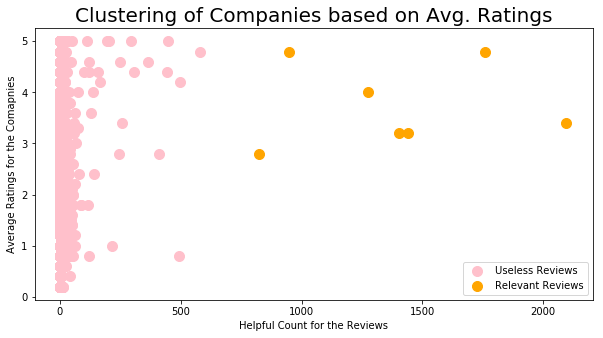

In [133]:
# from the above graph we come to the conclussion that 2 clusters are optimal no. of clusters

kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_means = kmeans.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Useless Reviews')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'Relevant Reviews')

plt.title('Clustering of Companies based on Avg. Ratings', fontsize = 20)
plt.xlabel('Helpful Count for the Reviews')
plt.ylabel('Average Ratings for the Comapnies')
plt.legend()
plt.show()


In [0]:
x1 = data['overall-ratings'][data['company'] == 'google']
x2 = data['work-balance-stars'][data['company'] == 'google']
x3 = data['culture-values-stars'][data['company'] == 'google']
x4 = data['carrer-opportunities-stars'][data['company'] == 'google']
x5 = data['comp-benefit-stars'][data['company'] == 'google']
x6 = data['senior-mangemnet-stars'][data['company'] == 'google']

data['dates'] = pd.to_datetime(data['dates'], errors = 'coerce')
data['year'] = data['dates'].dt.year


y1 = data['year'][data['company'] == 'google']

**Time-Series-Analysis for Google's Ratings**

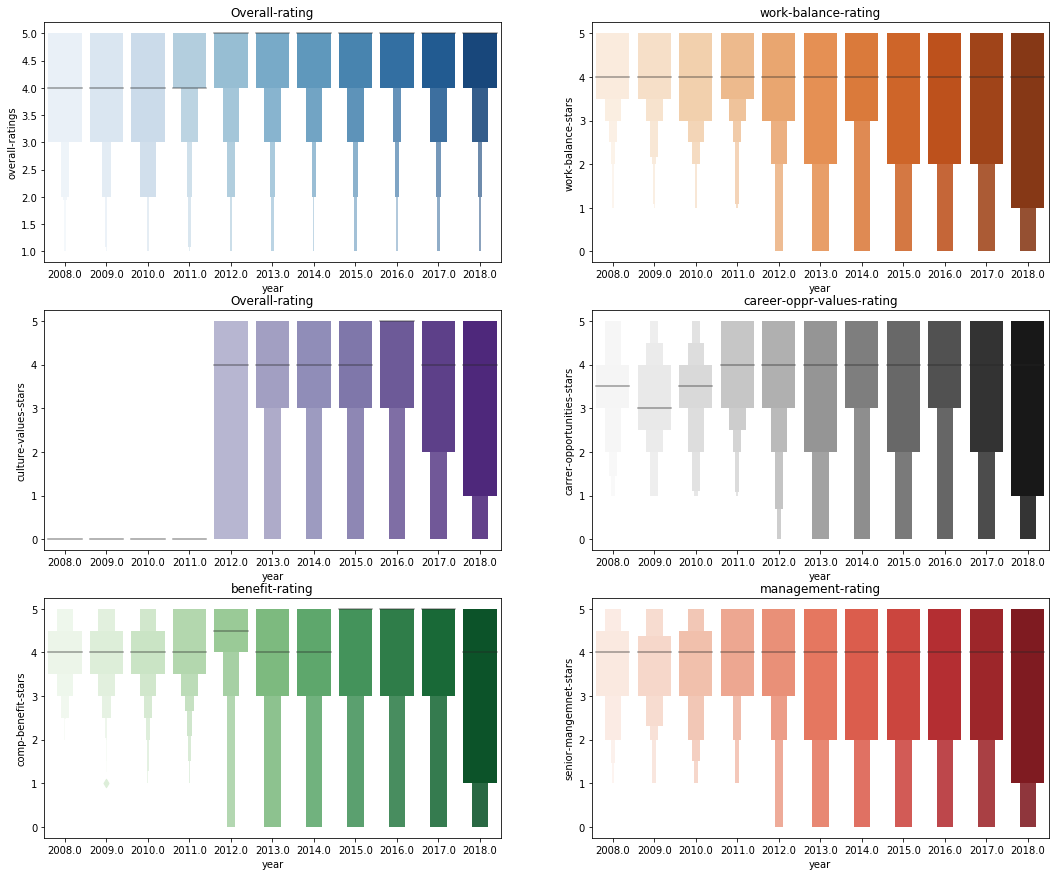

In [135]:
# cheking google's Time-series

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(3, 2, 1)
sns.boxenplot(y1, x1, palette = 'Blues')
plt.title('Overall-rating')

plt.subplot(3, 2, 2)
sns.boxenplot(y1, x2, palette = 'Oranges')
plt.title('work-balance-rating')

plt.subplot(3, 2, 3)
sns.boxenplot(y1, x3, palette = 'Purples')
plt.title('Overall-rating')

plt.subplot(3, 2, 4)
sns.boxenplot(y1, x4, palette = 'Greys')
plt.title('career-oppr-values-rating')

plt.subplot(3, 2, 5)
sns.boxenplot(y1, x5, palette = 'Greens')
plt.title('benefit-rating')

plt.subplot(3, 2, 6)
sns.boxenplot(y1, x6, palette = 'Reds')
plt.title('management-rating')
plt.show()

In [0]:
x1 = data['overall-ratings'][data['company'] == 'netflix']
x2 = data['work-balance-stars'][data['company'] == 'netflx']
x3 = data['culture-values-stars'][data['company'] == 'netflix']
x4 = data['carrer-opportunities-stars'][data['company'] == 'netflix']
x5 = data['comp-benefit-stars'][data['company'] == 'netflix']
x6 = data['senior-mangemnet-stars'][data['company'] == 'netflix']

data['dates'] = pd.to_datetime(data['dates'], errors = 'coerce')
data['year'] = data['dates'].dt.year


y1 = data['year'][data['company'] == 'netflix']

**Time Series Analysis for Netflix's Ratings**

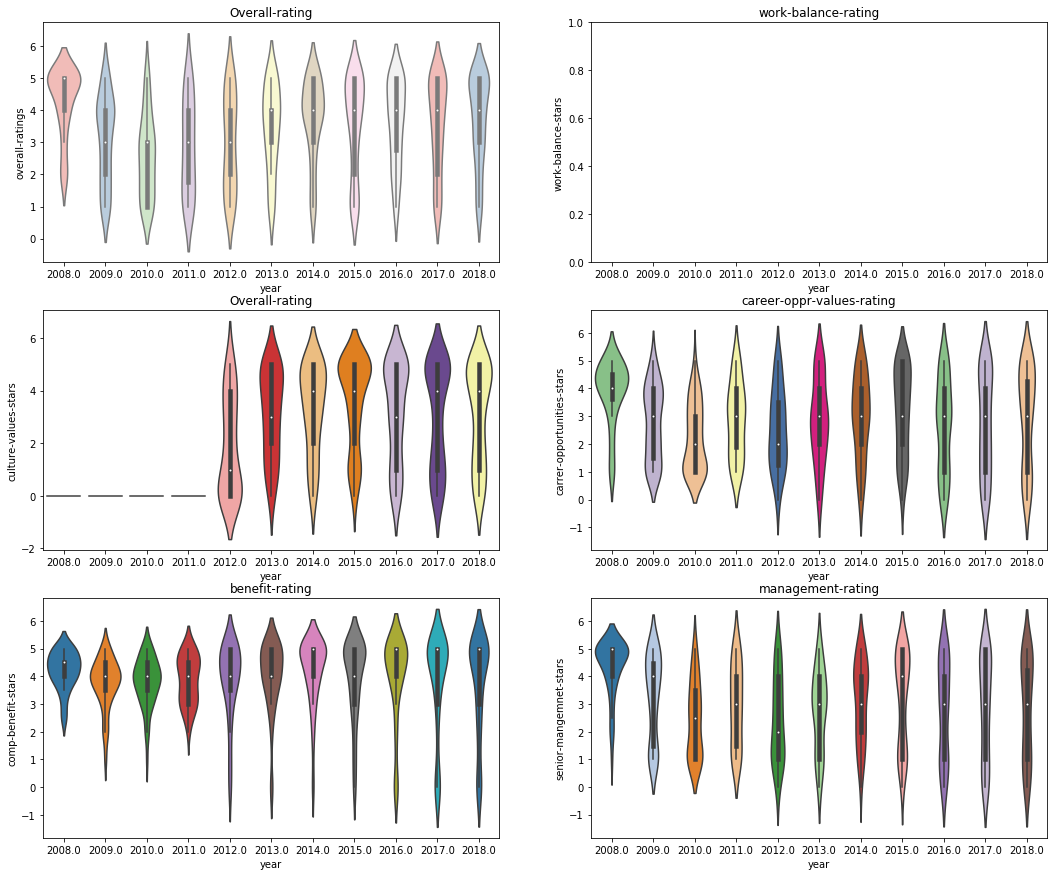

In [137]:
# cheking netflix's Time-series

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(3, 2, 1)
sns.violinplot(y1, x1, palette = 'Pastel1')
plt.title('Overall-rating')

plt.subplot(3, 2, 2)
sns.violinplot(y1, x2, palette = 'Pastel2')
plt.title('work-balance-rating')

plt.subplot(3, 2, 3)
sns.violinplot(y1, x3, palette = 'Paired')
plt.title('Overall-rating')

plt.subplot(3, 2, 4)
sns.violinplot(y1, x4, palette = 'Accent')
plt.title('career-oppr-values-rating')

plt.subplot(3, 2, 5)
sns.violinplot(y1, x5, palette = 'tab10')
plt.title('benefit-rating')

plt.subplot(3, 2, 6)
sns.violinplot(y1, x6, palette = 'tab20')
plt.title('management-rating')
plt.show()

In [0]:
x1 = data['overall-ratings'][data['company'] == 'facebook']
x2 = data['work-balance-stars'][data['company'] == 'facebook']
x3 = data['culture-values-stars'][data['company'] == 'facebook']
x4 = data['carrer-opportunities-stars'][data['company'] == 'facebook']
x5 = data['comp-benefit-stars'][data['company'] == 'facebook']
x6 = data['senior-mangemnet-stars'][data['company'] == 'facebook']

data['dates'] = pd.to_datetime(data['dates'], errors = 'coerce')
data['year'] = data['dates'].dt.year


y1 = data['year'][data['company'] == 'facebook']

**Time-Series Analysis for Facebook's Ratings**

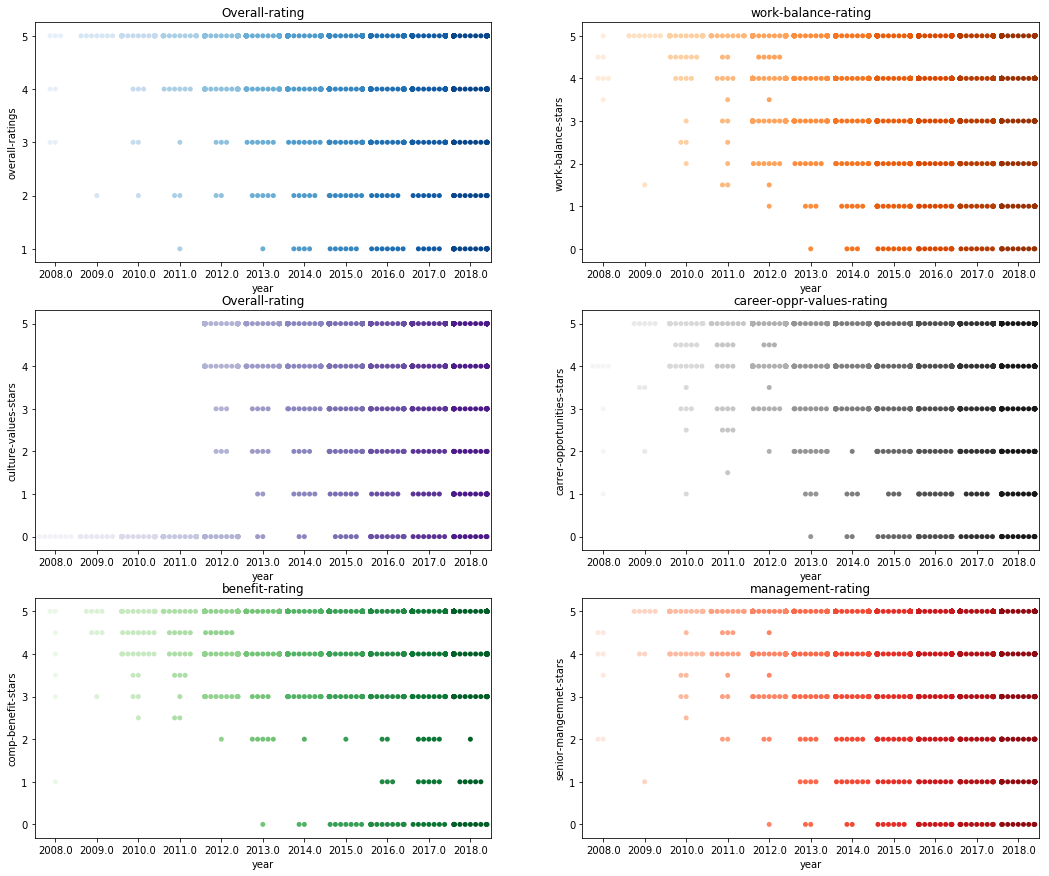

In [139]:
# cheking facebook's Time-series

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(3, 2, 1)
sns.swarmplot(y1, x1, palette = 'Blues')
plt.title('Overall-rating')

plt.subplot(3, 2, 2)
sns.swarmplot(y1, x2, palette = 'Oranges')
plt.title('work-balance-rating')

plt.subplot(3, 2, 3)
sns.swarmplot(y1, x3, palette = 'Purples')
plt.title('Overall-rating')

plt.subplot(3, 2, 4)
sns.swarmplot(y1, x4, palette = 'Greys')
plt.title('career-oppr-values-rating')

plt.subplot(3, 2, 5)
sns.swarmplot(y1, x5, palette = 'Greens')
plt.title('benefit-rating')

plt.subplot(3, 2, 6)
sns.swarmplot(y1, x6, palette = 'Reds')
plt.title('management-rating')
plt.show()

In [0]:
x1 = data['overall-ratings'][data['company'] == 'microsoft']
x2 = data['work-balance-stars'][data['company'] == 'microsoft']
x3 = data['culture-values-stars'][data['company'] == 'microsoft']
x4 = data['carrer-opportunities-stars'][data['company'] == 'microsoft']
x5 = data['comp-benefit-stars'][data['company'] == 'microsoft']
x6 = data['senior-mangemnet-stars'][data['company'] == 'microsoft']

data['dates'] = pd.to_datetime(data['dates'], errors = 'coerce')
data['year'] = data['dates'].dt.year


y1 = data['year'][data['company'] == 'microsoft']

**Time-Series Analysis for Microsoft's Ratings**

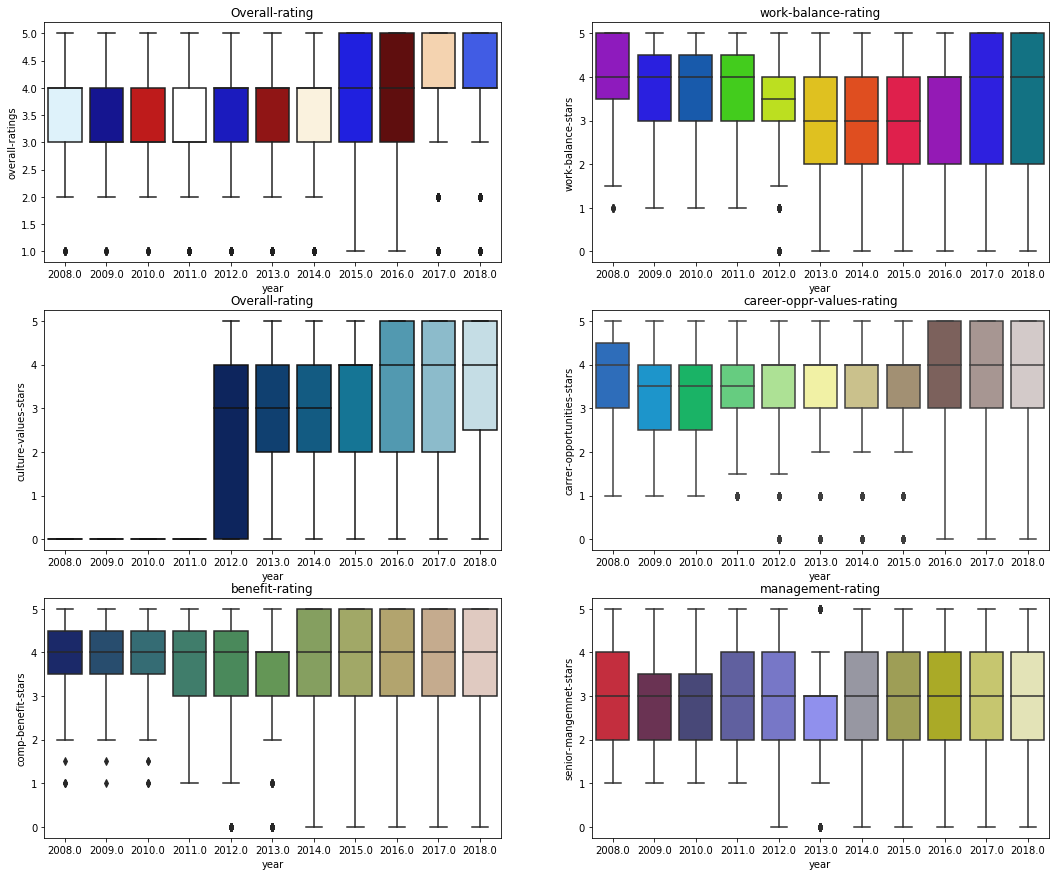

In [141]:
# cheking microsoft's Time-series

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(3, 2, 1)
sns.boxplot(y1, x1, palette = 'flag')
plt.title('Overall-rating')

plt.subplot(3, 2, 2)
sns.boxplot(y1, x2, palette = 'prism')
plt.title('work-balance-rating')

plt.subplot(3, 2, 3)
sns.boxplot(y1, x3, palette = 'ocean')
plt.title('Overall-rating')

plt.subplot(3, 2, 4)
sns.boxplot(y1, x4, palette = 'terrain')
plt.title('career-oppr-values-rating')

plt.subplot(3, 2, 5)
sns.boxplot(y1, x5, palette = 'gist_earth')
plt.title('benefit-rating')

plt.subplot(3, 2, 6)
sns.boxplot(y1, x6, palette = 'gist_stern')
plt.title('management-rating')
plt.show()

In [0]:
x1 = data['overall-ratings'][data['company'] == 'apple']
x2 = data['work-balance-stars'][data['company'] == 'apple']
x3 = data['culture-values-stars'][data['company'] == 'apple']
x4 = data['carrer-opportunities-stars'][data['company'] == 'apple']
x5 = data['comp-benefit-stars'][data['company'] == 'google']
x6 = data['senior-mangemnet-stars'][data['company'] == 'apple']

data['dates'] = pd.to_datetime(data['dates'], errors = 'coerce')
data['year'] = data['dates'].dt.year


y1 = data['year'][data['company'] == 'apple']

**Time-Series for Apple**

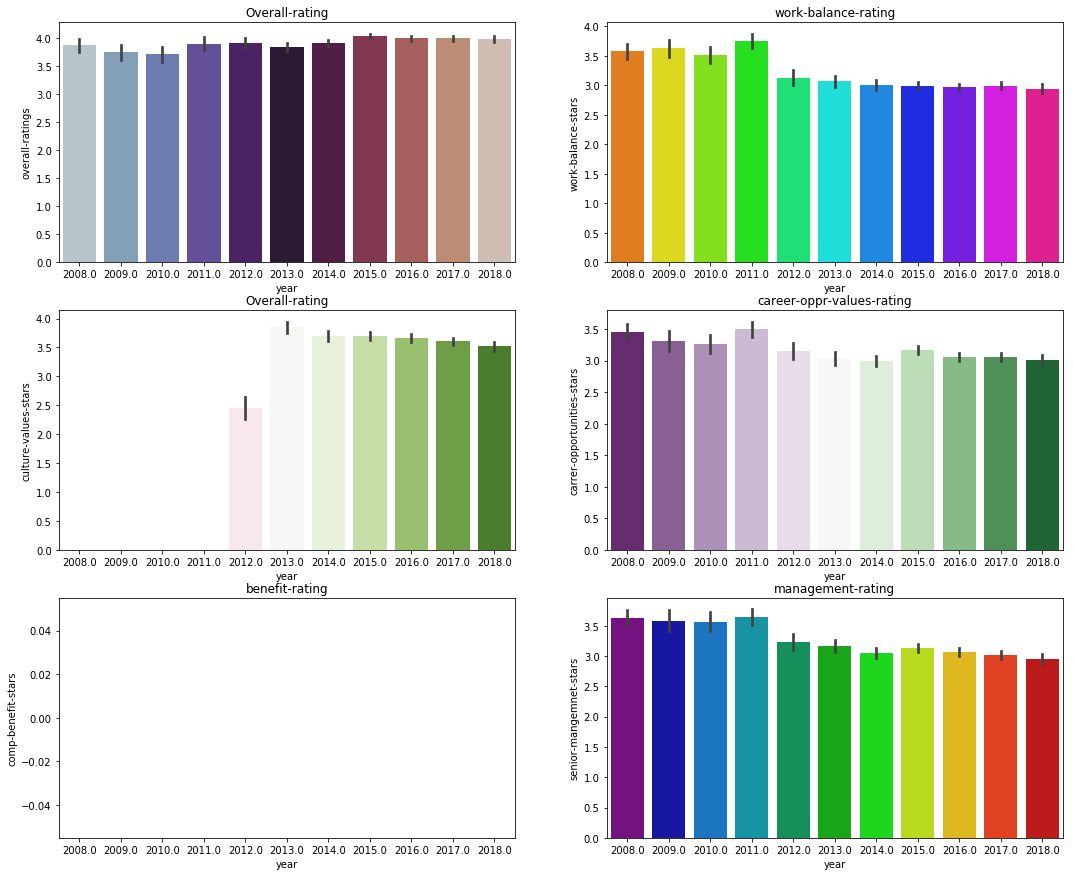

In [143]:
# cheking apple's Time-series

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(3, 2, 1)
sns.barplot(y1, x1, palette = 'twilight')
plt.title('Overall-rating')

plt.subplot(3, 2, 2)
sns.barplot(y1, x2, palette = 'hsv')
plt.title('work-balance-rating')

plt.subplot(3, 2, 3)
sns.barplot(y1, x3, palette = 'PiYG')
plt.title('Overall-rating')

plt.subplot(3, 2, 4)
sns.barplot(y1, x4, palette = 'PRGn')
plt.title('career-oppr-values-rating')

plt.subplot(3, 2, 5)
sns.barplot(y1, x5, palette = 'gist_ncar')
plt.title('benefit-rating')

plt.subplot(3, 2, 6)
sns.barplot(y1, x6, palette = 'nipy_spectral')
plt.title('management-rating')
plt.show()

In [0]:
x1 = data['overall-ratings'][data['company'] == 'amazon']
x2 = data['work-balance-stars'][data['company'] == 'amazon']
x3 = data['culture-values-stars'][data['company'] == 'amazon']
x4 = data['carrer-opportunities-stars'][data['company'] == 'amazon']
x5 = data['comp-benefit-stars'][data['company'] == 'amazon']
x6 = data['senior-mangemnet-stars'][data['company'] == 'amazon']

data['dates'] = pd.to_datetime(data['dates'], errors = 'coerce')
data['year'] = data['dates'].dt.year


y1 = data['year'][data['company'] == 'amazon']

**Time-Series Analysis for Amazon**

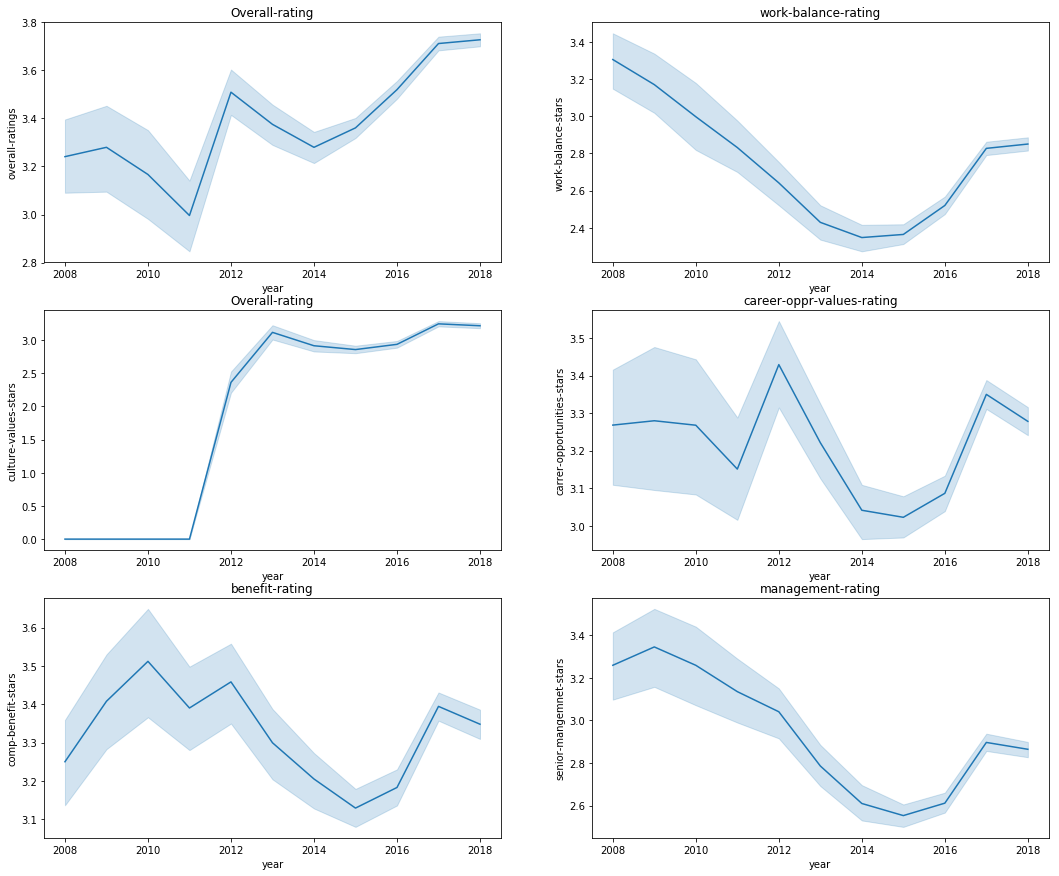

In [145]:
# cheking amazon's Time-series

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(3, 2, 1)
sns.lineplot(y1, x1)
plt.title('Overall-rating')

plt.subplot(3, 2, 2)
sns.lineplot(y1, x2)
plt.title('work-balance-rating')

plt.subplot(3, 2, 3)
sns.lineplot(y1, x3)
plt.title('Overall-rating')

plt.subplot(3, 2, 4)
sns.lineplot(y1, x4)
plt.title('career-oppr-values-rating')

plt.subplot(3, 2, 5)
sns.lineplot(y1, x5)
plt.title('benefit-rating')

plt.subplot(3, 2, 6)
sns.lineplot(y1, x6)
plt.title('management-rating')
plt.show()

In [146]:
data.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link', 'avg-ratings',
       'year'],
      dtype='object')

In [154]:
# feature engineering

data['Satisfaction'] = pd.cut(data['avg-ratings'], 2)

data['Satisfaction'].value_counts()

(2.6, 5.0]      49380
(0.195, 2.6]    18149
Name: Satisfaction, dtype: int64

Text(0.5, 1.0, 'Satisfaction vs Company')

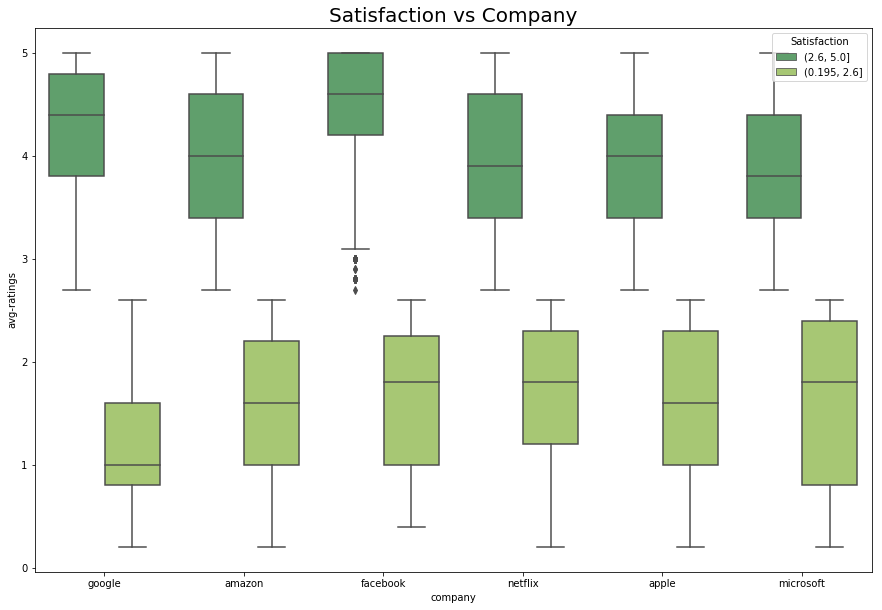

In [157]:
# satisfied employees in each company

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(data['company'], data['avg-ratings'], hue = data['Satisfaction'], palette = 'summer')
plt.title('Satisfaction vs Company', fontsize = 20)

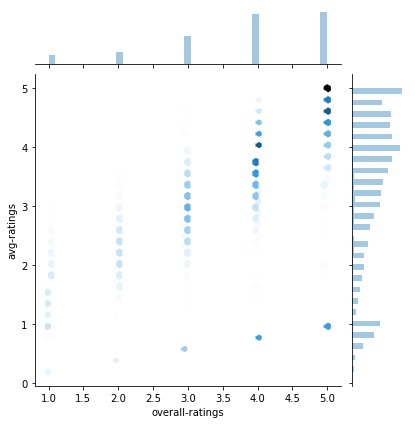

In [155]:
# Relation between overall and avg ratings

sns.jointplot(x = data['overall-ratings'], y = data['avg-ratings'], kind = 'hex')